In [122]:
from random import randint
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.style.use(['ggplot'])
from scipy.optimize import curve_fit
import numpy as np

## Пузырьком

In [77]:
def bubbleSort(x): 
    n = len(x) 
    for i in range(n-1):
        for j in range(0, n-i-1):  
            if x[j] > x[j+1] : 
                x[j], x[j+1] = x[j+1], x[j] 
    return x

## Вставками

In [78]:
def insertionSort(x): 
    for i in range(1, len(x)): 
        insert = x[i] 
        j = i-1
        while j >=0 and insert < x[j] : 
                x[j+1] = x[j] 
                j -= 1
        x[j+1] = insert
    return x

## Слиянием

In [79]:
def Merge(x, y):
    if len(x) == 0:
        return y
    if len(y) == 0:
        return x
    if x[0] <= y[0]:
        return [x[0]] + Merge(x[1:], y)
    else:
        return [y[0]] + Merge(x, y[1:])

In [80]:
def MergeSort(a):
    l = len(a)
    if l > 1:
        return Merge(MergeSort(a[:l//2]), MergeSort(a[l//2:]))
    else:
        return a

### Проверим работу

In [81]:
z = [randint(-10, 20) for i in range(20)]
z

[17, -8, -8, -3, 6, -6, 5, 4, 9, 20, 11, 17, -1, 1, 15, 20, -6, 7, 17, -9]

In [82]:
bubbleSort(z)

[-9, -8, -8, -6, -6, -3, -1, 1, 4, 5, 6, 7, 9, 11, 15, 17, 17, 17, 20, 20]

In [83]:
insertionSort(z)

[-9, -8, -8, -6, -6, -3, -1, 1, 4, 5, 6, 7, 9, 11, 15, 17, 17, 17, 20, 20]

In [84]:
MergeSort(z)

[-9, -8, -8, -6, -6, -3, -1, 1, 4, 5, 6, 7, 9, 11, 15, 17, 17, 17, 20, 20]

### Оценим эффективность

In [85]:
# Декоратор для удобства
def mes_time(f):
    def t(*args, **kwargs):
        start=time.time()
        f(*args, **kwargs)
        end = time.time() - start
        return end
    return t

In [87]:
@mes_time
def time_bubbleSort(x): 
    n = len(x) 
    for i in range(n-1):
        for j in range(0, n-i-1):  
            if x[j] > x[j+1] : 
                x[j], x[j+1] = x[j+1], x[j] 
    return x

In [88]:
@mes_time
def time_insertionSort(x): 
    for i in range(1, len(x)): 
        insert = x[i] 
        j = i-1
        while j >=0 and insert < x[j] : 
                x[j+1] = x[j] 
                j -= 1
        x[j+1] = insert
    return x

In [89]:
@mes_time
def time_MergeSort(a):
    l = len(a)
    if l > 1:
        return Merge(MergeSort(a[:l//2]), MergeSort(a[l//2:]))
    else:
        return a

In [86]:
Xo = [i for i in range(50, 1050, 50)]

In [96]:
def good_measure(func, Xo, iterations=50):
    output = []
    for now in Xo:
        t = 0
        for it in range(iterations):
            z = [randint(-1000, 1000) for i in range(now)]
            t += func(z)
        output.append(t/iterations)
    return output

#### Время работы:

In [98]:
bubble_t = good_measure(time_bubbleSort, Xo, iterations=50)

In [100]:
insertion_t = good_measure(time_insertionSort, Xo, iterations=50)

In [101]:
Merge_t = good_measure(time_MergeSort, Xo, iterations=50)

#### Функции аппроксимации

In [157]:
def func_bubble(t, C):
    return C*t**2

In [158]:
def func_insertion(t, C):
    return C*t**2

In [159]:
def func_Merge(t, C):
    return C*t*np.log(t)

In [160]:
popt_bubble, pcov = curve_fit(func_bubble, Xo, bubble_t)

In [161]:
popt_insertion, pcov = curve_fit(func_insertion, Xo, insertion_t)

In [162]:
popt_Merge, pcov = curve_fit(func_Merge, Xo, Merge_t)

#### Построим график:

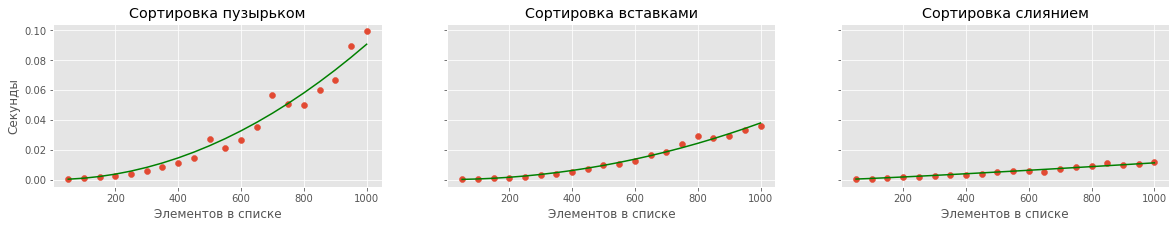

In [178]:
fig, axs = plt.subplots(1, 3, figsize=(20, 3), sharey=True)
axs[0].scatter(Xo, bubble_t)
axs[0].plot(Xo, func_bubble(np.array(Xo), *popt_bubble),'G')
axs[0].set_ylabel('Секунды')
axs[0].set_xlabel('Элементов в списке')
axs[0].set_title('Сортировка пузырьком')
axs[1].scatter(Xo, insertion_t)
axs[1].plot(Xo, func_insertion(np.array(Xo), *popt_insertion), 'G')
axs[1].set_xlabel('Элементов в списке')
axs[1].set_title('Сортировка вставками')
axs[2].scatter(Xo, Merge_t);
axs[2].plot(Xo, func_Merge(np.array(Xo), *popt_Merge), 'G')
axs[2].set_xlabel('Элементов в списке')
axs[2].set_title('Сортировка слиянием');